In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("credit.csv")

# View first rows
df.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [4]:
df.describe()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [5]:
df.isnull().sum()


,0
Unnamed: 0,0
Income,0
Limit,0
Rating,0
Cards,0
Age,0
Education,0
Gender,0
Student,0
Married,0


In [6]:
df = df.dropna()


In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df = df.drop_duplicates()


In [9]:
df.dtypes


,0
Unnamed: 0,int64
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Education,int64
Gender,object
Student,object
Married,object


In [10]:
df_processed = pd.get_dummies(
    df,
    columns=["Gender", "Student", "Married", "Ethnicity"],
    drop_first=True
)


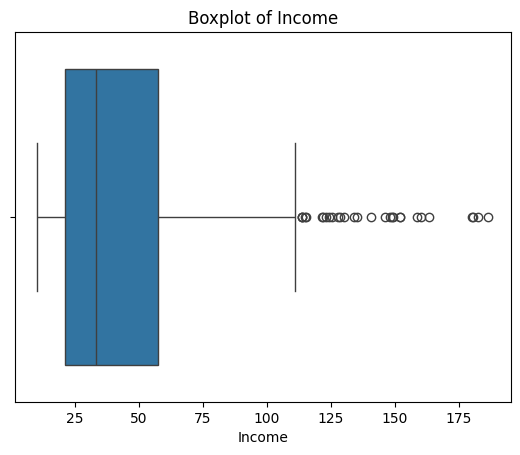

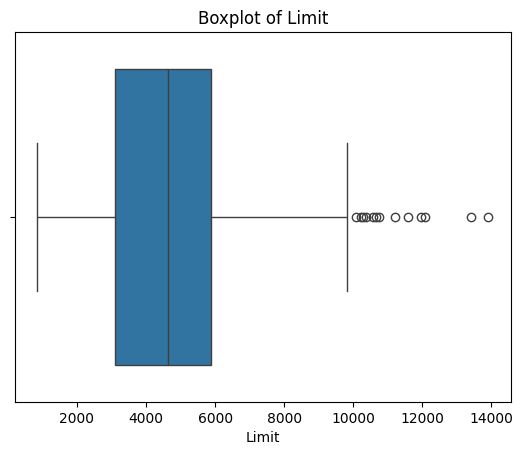

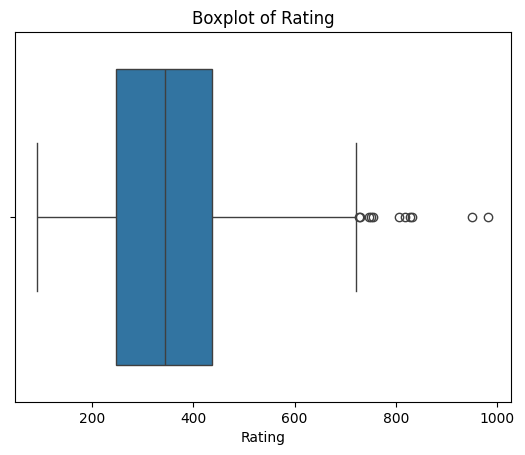

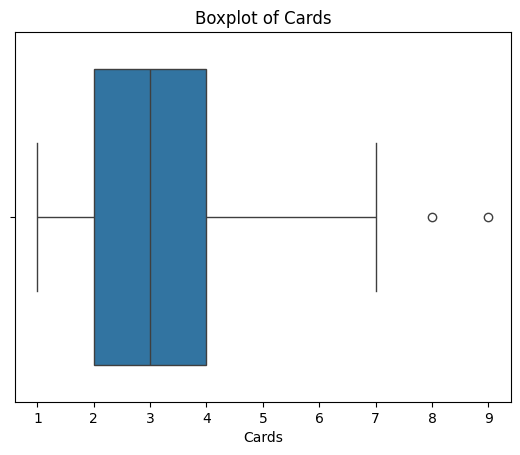

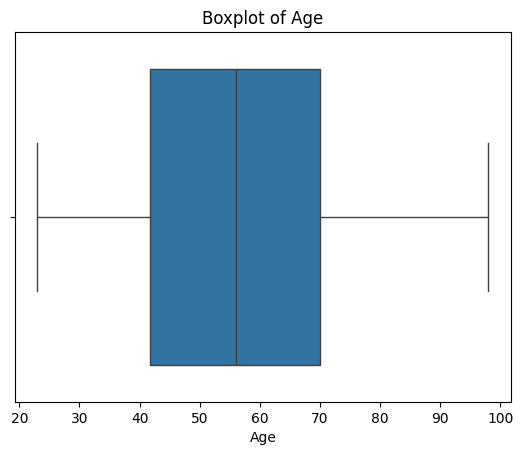

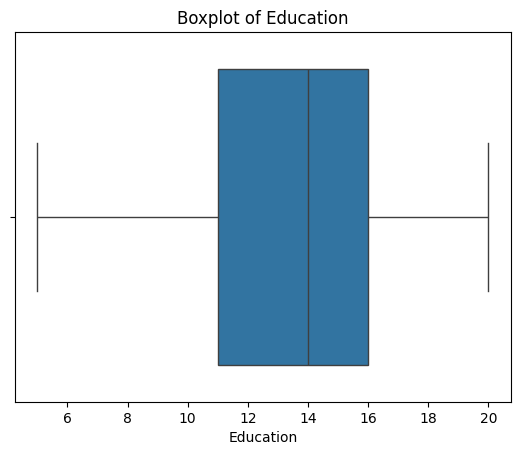

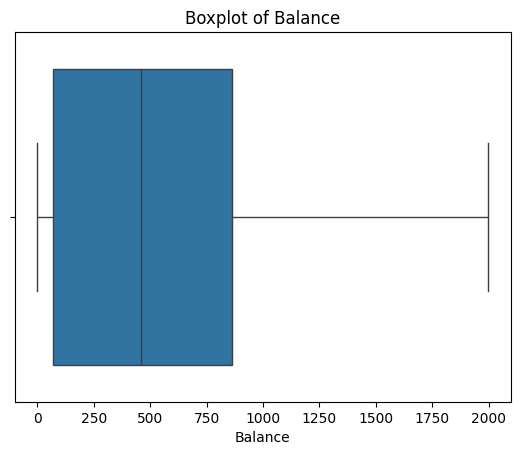

In [11]:
numerical_cols = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance"]

for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


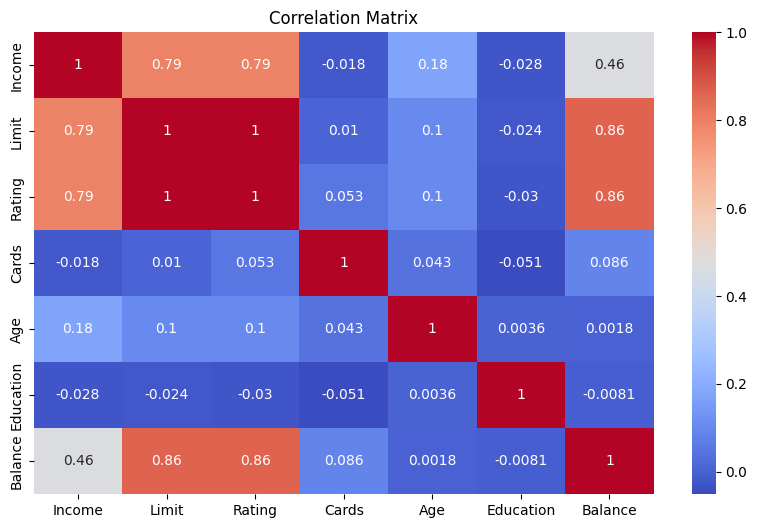

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [13]:
X = df_processed.drop("Limit", axis=1)
y = df_processed["Limit"]


In [14]:
import statsmodels.api as sm

X = sm.add_constant(X)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [18]:
X_train.dtypes


,0
const,float64
Unnamed: 0,int64
Income,float64
Rating,int64
Cards,int64
Age,int64
Education,int64
Balance,int64
Gender_Male,bool
Student_Yes,bool


In [19]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [20]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [21]:
import statsmodels.api as sm

model_full = sm.OLS(y_train, X_train).fit()
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5838.
Date:                Mon, 15 Dec 2025   Prob (F-statistic):          2.78e-315
Time:                        05:11:25   Log-Likelihood:                -1792.3
No. Observations:                 280   AIC:                             3611.
Df Residuals:                     267   BIC:                             3658.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -112.7048    

In [23]:
model_full.pvalues.sort_values(ascending=False)



,0
Unnamed: 0,6.323751e-01
Age,5.841256e-01
Gender_Male,5.819612e-01
Ethnicity_Caucasian,5.180923e-01
Education,4.186084e-01
Ethnicity_Asian,1.666748e-01
const,1.613914e-01
Married_Yes,8.822375e-02
Income,1.625800e-05
Student_Yes,2.862374e-06


In [24]:
X_train_be = X_train.drop("Education", axis=1)
X_test_be = X_test.drop("Education", axis=1)


In [25]:
model_be_1 = sm.OLS(y_train, X_train_be).fit()
print(model_be_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6376.
Date:                Mon, 15 Dec 2025   Prob (F-statistic):          4.72e-317
Time:                        05:12:27   Log-Likelihood:                -1792.6
No. Observations:                 280   AIC:                             3609.
Df Residuals:                     268   BIC:                             3653.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -79.4653    

In [26]:
final_vars = [
    "const",
    "Income",
    "Rating",
    "Cards",
    "Age",
    "Student_Yes",
    "Gender_Male"
]

X_train_final = X_train[final_vars]
X_test_final = X_test[final_vars]


In [27]:
final_model = sm.OLS(y_train, X_train_final).fit()
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Limit   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.042e+04
Date:                Mon, 15 Dec 2025   Prob (F-statistic):          4.06e-319
Time:                        05:12:41   Log-Likelihood:                -1811.3
No. Observations:                 280   AIC:                             3637.
Df Residuals:                     273   BIC:                             3662.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -344.4350     45.223     -7.616      

In [28]:
# R-squared
final_model.rsquared

# F-statistic and p-value
final_model.fvalue
final_model.f_pvalue

# t-statistics and p-values
final_model.tvalues
final_model.pvalues


,0
const,4.289948e-13
Income,7.146521e-01
Rating,6.031396e-264
Cards,3.386280e-24
Age,8.894975e-01
Student_Yes,6.134722e-01
Gender_Male,9.536753e-01


In [29]:
final_model.params


,0
const,-344.435047
Income,-0.170632
Rating,14.931211
Cards,-74.610398
Age,0.080201
Student_Yes,-16.223990
Gender_Male,1.108847


In [30]:
y_pred = final_model.predict(X_test_final)


In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse


20908.10579783366

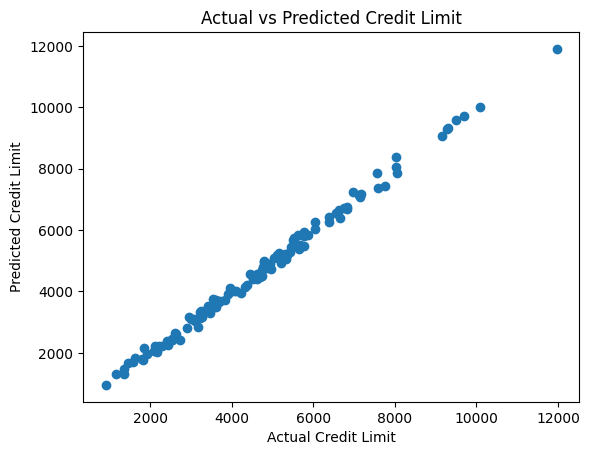

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Credit Limit")
plt.ylabel("Predicted Credit Limit")
plt.title("Actual vs Predicted Credit Limit")
plt.show()


In [33]:
my_data = pd.DataFrame({
    "const": [1],
    "Income": [30],        # your income
    "Rating": [420],
    "Cards": [2],
    "Age": [24],
    "Student_Yes": [1],    # 1 if student, 0 otherwise
    "Gender_Male": [1]     # 1 if male, 0 if female
})

my_limit = final_model.predict(my_data)
my_limit


,0
0,5759.143565
